In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
sexs = LabelEncoder()

data['sex'] = sexs.fit_transform(data['sex'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [5]:
smokers = LabelEncoder()

data['smoker'] = smokers.fit_transform(data['smoker'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [6]:
regions = LabelEncoder()

data['region'] = regions.fit_transform(data['region'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


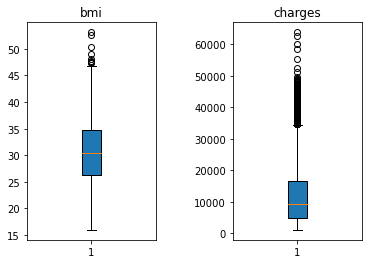

In [7]:
import matplotlib.pyplot as plt

i=1

column_names = ['bmi','charges']

for col in column_names:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,2,i)
    i=i+1
    plt.boxplot(data[col],patch_artist=True)
    plt.title(col)

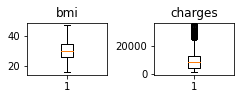

In [8]:
outlier_columns = ['bmi','charges']

i=1

for col in outlier_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_index=np.where(data[col] >= upper)[0]
    lower_index=np.where(data[col] <= lower)[0]
    
    data.drop(index= upper_index , inplace = True)
    data.drop(index= lower_index , inplace = True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(3,3,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)
    
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    #data.reset_index(drop=True, inplace=True)
    

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1186,50,1,30.970,3,0,1,10600.54830
1187,18,0,31.920,0,0,0,2205.98080
1188,18,0,36.850,0,0,2,1629.83350
1189,21,0,25.800,0,0,3,2007.94500


In [10]:
x=data.drop('charges', axis = 1)

In [11]:
y=data['charges']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=120)

In [13]:
model1 = DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
model1.get_depth()

19

In [20]:
print("Test Score",model1.score(x_test,y_test))
print("Train Score",model1.score(x_train,y_train))
y_pred1 = model1.predict(x_test)
print(" Error " ,mean_squared_error(y_test,y_pred1))

Test Score 0.29437598597256065
Train Score 0.9938905119981061
 Error  36802002.95606033


In [17]:
### model 2 

In [18]:
model2 = DecisionTreeRegressor(max_depth=10)
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [22]:
print("Test Score",model2.score(x_test,y_test))
print("Train Score",model2.score(x_train,y_train))
y_pred2 = model2.predict(x_test)
print(" Error " ,mean_squared_error(y_test,y_pred2))

Test Score 0.3816188026688997
Train Score 0.9236968169325318
 Error  32251831.28655016


In [27]:
age =  int(input("enter yours age :"))

gender = input("enter your sex [male/female]:")
gender = int(sexs.transform([gender]))

bmi = int(input("enter the bmi value"))

children = int(input("Enter the no .of children"))

smoke = input("Are you a Smoker [yes/no]")
smoke = int(smokers.transform([smoke]))

place = input("enter the region [southwest southeast northwest northeast]")
place = int(regions.transform([place]))

enter yours age :20
enter your sex [male/female]:male
enter the bmi value27
Enter the no .of children0
Are you a Smoker [yes/no]yes
enter the region [southwest southeast northwest northeast]southwest


In [28]:
model2.predict([[age,gender,bmi,children,smoke,place]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([16678.02604])

In [29]:
model1.predict([[age,gender,bmi,children,smoke,place]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([16232.847])